# Data

In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

df_2022=pd.read_csv('df_2022.csv')
df_2023=pd.read_csv('df_2023.csv')
df_2024=pd.read_csv('df_2024_adjusted.csv')
df_22_24=pd.read_csv('df_22_24.csv')

# Create a datetime index for df_2024, starting from January 1st, 2024
date_range_2024 = pd.date_range(start="2024-01-01", periods=len(df_2024), freq="H")
# Assign the datetime index to df_2024
df_2024.index = date_range_2024

# Create a datetime index for df_2024, starting from January 1st, 2024
date_range_2023 = pd.date_range(start="2023-01-01", periods=len(df_2023), freq="H")
# Assign the datetime index to df_2024
df_2023.index = date_range_2023

# Create a datetime index for df_2022, starting from November 1st, 2022
date_range_2022 = pd.date_range(start="2022-11-01", periods=len(df_2022), freq="H")
# Assign the datetime index to df_2022
df_2022.index = date_range_2022

date_range_22_24= pd.date_range(start="2022-11-01", periods=len(df_22_24), freq="H")
df_22_24.index=date_range_22_24

# Outliers extraction

### Highest prices

In [92]:
percentile = 0.01


In [93]:
quantile_2023_pos_sec = df_2023['Price_positive_secondary_2023'].quantile(1-percentile)
quantile_2023_neg_sec = df_2023['Price_negative_secondary_2023'].quantile(1-percentile)
quantile_2023_pos_ter = df_2023['Price_positive_tertiary_2023'].quantile(1-percentile)
quantile_2023_neg_ter = df_2023['Price_negative_tertiary_2023'].quantile(1-percentile)

df_2023_pos_sec_h = df_2023[df_2023['Price_positive_secondary_2023'] >= quantile_2023_pos_sec]
df_2023_neg_sec_h = df_2023[df_2023['Price_negative_secondary_2023'] >= quantile_2023_neg_sec]
df_2023_pos_ter_h = df_2023[df_2023['Price_positive_tertiary_2023'] >= quantile_2023_pos_ter]
df_2023_neg_ter_h = df_2023[df_2023['Price_negative_tertiary_2023'] >= quantile_2023_neg_ter]

In [94]:
df_2023_pos_sec_h.shape, df_2023_neg_sec_h.shape, df_2023_pos_ter_h.shape, df_2023_neg_ter_h.shape

((88, 48), (88, 48), (88, 48), (92, 48))

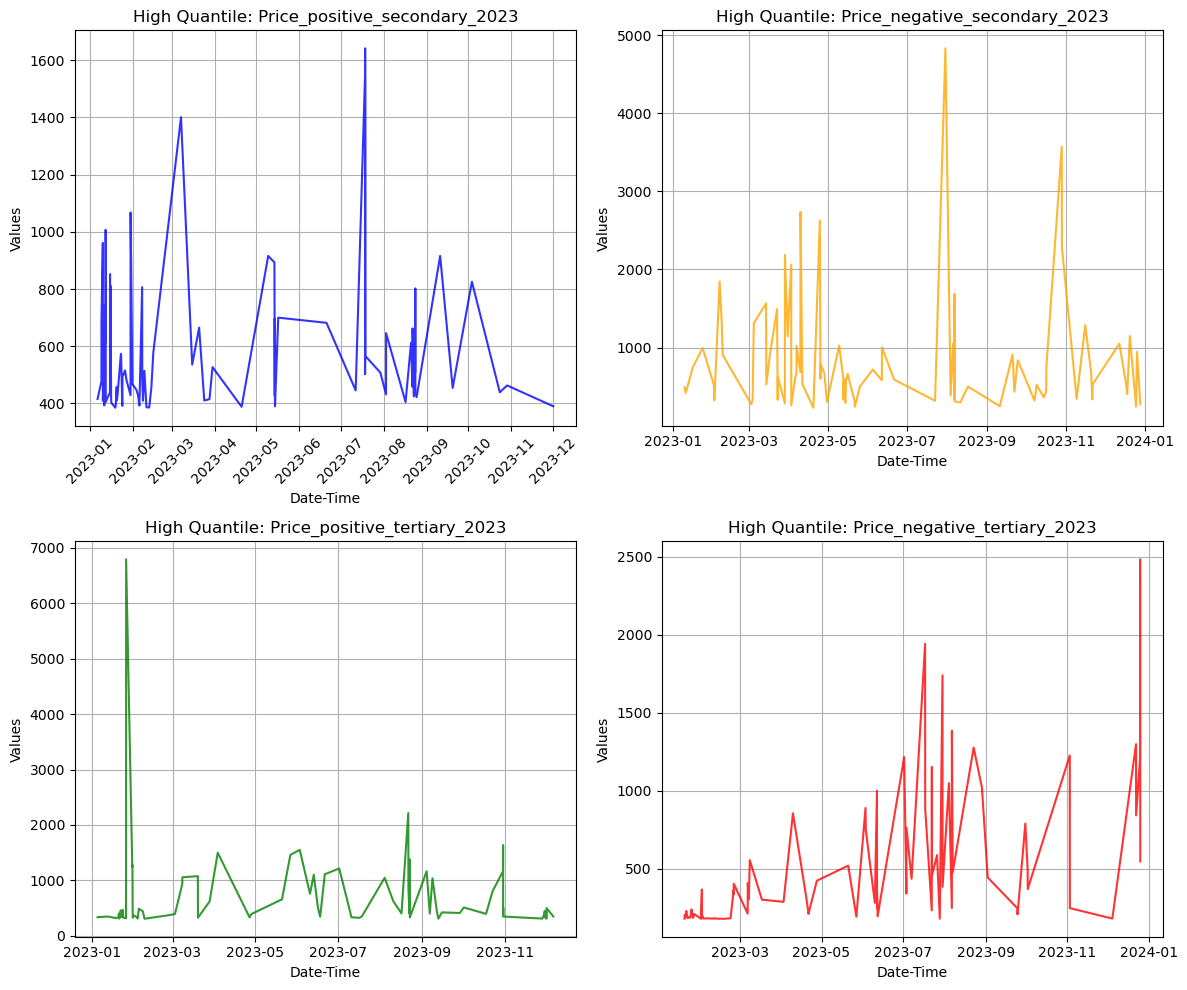

In [95]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

#
# 1) Plot for Price_positive_secondary_2023 (HIGH)
#
axs[0, 0].plot(
    df_2023_pos_sec_h.index, 
    df_2023_pos_sec_h['Price_positive_secondary_2023'], 
    label='Price_positive_secondary_2023 (high quantile)',
    alpha=0.8, color='blue'
)
axs[0, 0].set_title('High Quantile: Price_positive_secondary_2023')
axs[0, 0].set_xlabel('Date-Time')
axs[0, 0].set_ylabel('Values')
axs[0, 0].grid(True)
axs[0, 0].tick_params(axis='x', rotation=45)

#
# 2) Plot for Price_negative_secondary_2023 (HIGH)
#
axs[0, 1].plot(
    df_2023_neg_sec_h.index, 
    df_2023_neg_sec_h['Price_negative_secondary_2023'], 
    label='Price_negative_secondary_2023 (high quantile)',
    alpha=0.8, color='orange'
)
axs[0, 1].set_title('High Quantile: Price_negative_secondary_2023')
axs[0, 1].set_xlabel('Date-Time')
axs[0, 1].set_ylabel('Values')
axs[0, 1].grid(True)

#
# 3) Plot for Price_positive_tertiary_2023 (HIGH)
#
axs[1, 0].plot(
    df_2023_pos_ter_h.index, 
    df_2023_pos_ter_h['Price_positive_tertiary_2023'], 
    label='Price_positive_tertiary_2023 (high quantile)',
    alpha=0.8, color='green'
)
axs[1, 0].set_title('High Quantile: Price_positive_tertiary_2023')
axs[1, 0].set_xlabel('Date-Time')
axs[1, 0].set_ylabel('Values')
axs[1, 0].grid(True)

#
# 4) Plot for Price_negative_tertiary_2023 (HIGH)
#
axs[1, 1].plot(
    df_2023_neg_ter_h.index, 
    df_2023_neg_ter_h['Price_negative_tertiary_2023'], 
    label='Price_negative_tertiary_2023 (high quantile)',
    alpha=0.8, color='red'
)
axs[1, 1].set_title('High Quantile: Price_negative_tertiary_2023')
axs[1, 1].set_xlabel('Date-Time')
axs[1, 1].set_ylabel('Values')
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()


### Smallest Prices

In [96]:
quantile_2023_pos_sec = df_2023['Price_positive_secondary_2023'].quantile(percentile)
quantile_2023_neg_sec = df_2023['Price_negative_secondary_2023'].quantile(percentile)
quantile_2023_pos_ter = df_2023['Price_positive_tertiary_2023'].quantile(percentile)
quantile_2023_neg_ter = df_2023['Price_negative_tertiary_2023'].quantile(percentile)

df_2023_pos_sec_l = df_2023[df_2023['Price_positive_secondary_2023'] <= quantile_2023_pos_sec]
df_2023_neg_sec_l = df_2023[df_2023['Price_negative_secondary_2023'] <= quantile_2023_neg_sec]
df_2023_pos_ter_l = df_2023[df_2023['Price_positive_tertiary_2023'] <= quantile_2023_pos_ter]
df_2023_neg_ter_l = df_2023[df_2023['Price_negative_tertiary_2023'] <= quantile_2023_neg_ter]

In [97]:
df_2023_neg_sec_l.head()

,Unnamed: 0,Price_positive_secondary_2023,Price_negative_secondary_2023,Price_positive_tertiary_2023,Price_negative_tertiary_2023,Price_gas_2023,Imbalance netting import_2023,Imbalance netting export_2023,Energy_positive_secondary_2023_24,Energy_negative_secondary_2023_24,...,RR n 2023,Total System Imbalance 2023,Exchange_CH_AT_2023,Exchange_AT_CH_2023,Exchange_CH_DE_2023,Exchange_DE_CH_2023,Exchange_CH_FR_2023,Exchange_FR_CH_2023,Exchange_CH_IT_2023,Exchange_IT_CH_2023
2023-01-01 01:00:00,1,0.00,0.0,0.0,0.000,67.5,11.708483,0.000000,0.000,0.0,...,0.0,-74.068023,32.200,203.940,13.400,529.105,108.382,169.753,451.595,0.015
2023-01-01 16:00:00,16,124.10,0.0,0.0,8.212,67.5,0.000000,-24.359726,12.150,0.0,...,0.0,179.486719,103.631,13.587,185.286,131.972,0.000,377.847,296.963,0.000
2023-01-01 17:00:00,17,245.40,0.0,0.0,7.020,67.5,10.087219,0.000000,33.907,0.0,...,-30.0,102.372566,141.281,9.200,317.490,130.400,0.000,367.135,255.358,0.512
2023-01-03 08:00:00,56,233.00,0.0,0.0,125.873,62.5,65.797542,0.000000,5.331,0.0,...,-140.0,229.479349,53.700,112.877,166.966,226.660,0.001,303.776,579.971,0.800
2023-01-04 06:00:00,78,305.45,0.0,0.0,0.000,66.4,0.000000,-31.754151,35.968,0.0,...,0.0,96.933341,55.200,249.948,22.900,716.570,0.000,698.575,901.752,0.193


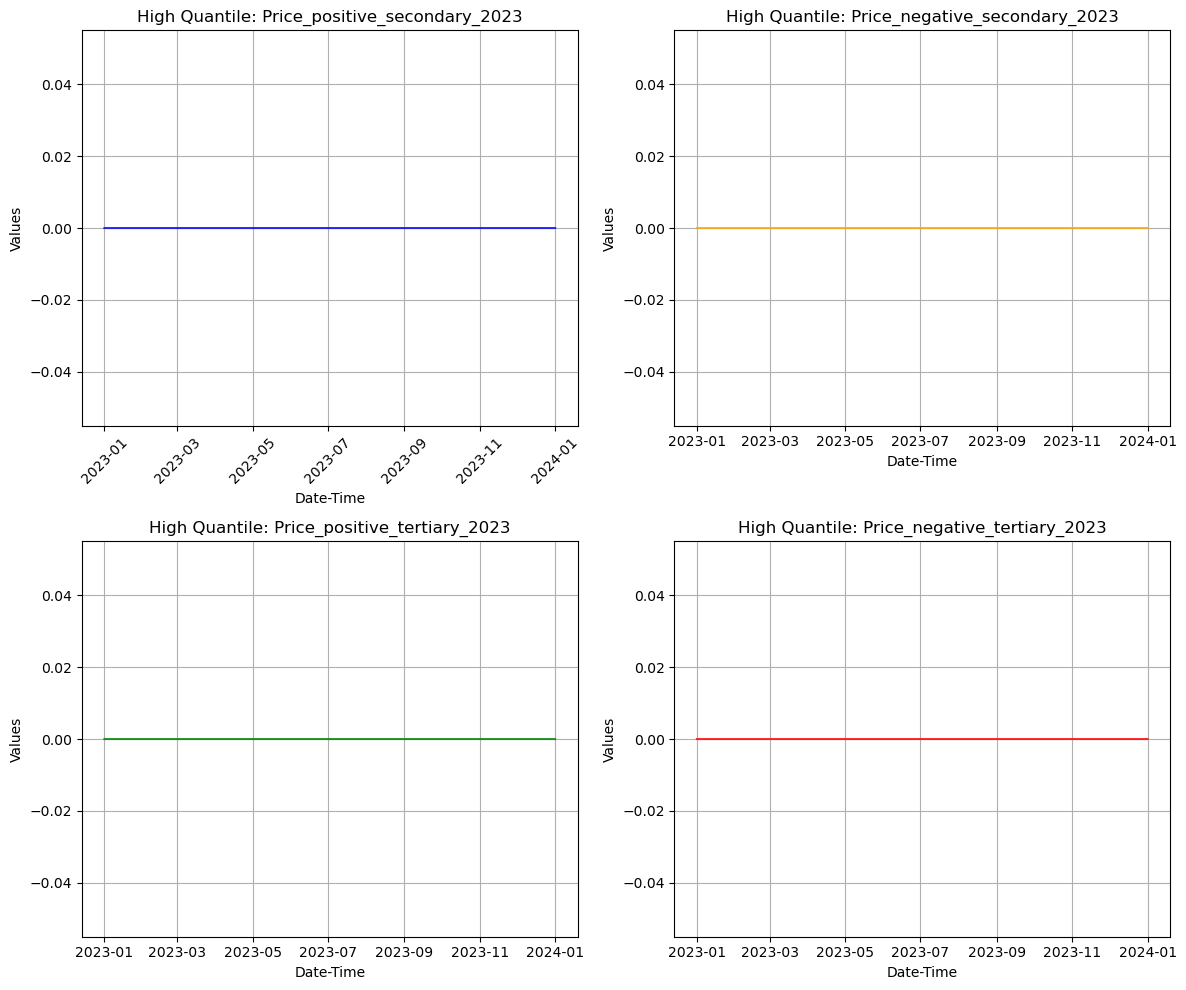

In [98]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

#
# 1) Plot for Price_positive_secondary_2023 (HIGH)
#
axs[0, 0].plot(
    df_2023_pos_sec_l.index, 
    df_2023_pos_sec_l['Price_positive_secondary_2023'], 
    label='Price_positive_secondary_2023 (high quantile)',
    alpha=0.8, color='blue'
)
axs[0, 0].set_title('High Quantile: Price_positive_secondary_2023')
axs[0, 0].set_xlabel('Date-Time')
axs[0, 0].set_ylabel('Values')
axs[0, 0].grid(True)
axs[0, 0].tick_params(axis='x', rotation=45)

#
# 2) Plot for Price_negative_secondary_2023 (HIGH)
#
axs[0, 1].plot(
    df_2023_neg_sec_l.index, 
    df_2023_neg_sec_l['Price_negative_secondary_2023'], 
    label='Price_negative_secondary_2023 (high quantile)',
    alpha=0.8, color='orange'
)
axs[0, 1].set_title('High Quantile: Price_negative_secondary_2023')
axs[0, 1].set_xlabel('Date-Time')
axs[0, 1].set_ylabel('Values')
axs[0, 1].grid(True)

#
# 3) Plot for Price_positive_tertiary_2023 (HIGH)
#
axs[1, 0].plot(
    df_2023_pos_ter_l.index, 
    df_2023_pos_ter_l['Price_positive_tertiary_2023'], 
    label='Price_positive_tertiary_2023 (high quantile)',
    alpha=0.8, color='green'
)
axs[1, 0].set_title('High Quantile: Price_positive_tertiary_2023')
axs[1, 0].set_xlabel('Date-Time')
axs[1, 0].set_ylabel('Values')
axs[1, 0].grid(True)

#
# 4) Plot for Price_negative_tertiary_2023 (HIGH)
#
axs[1, 1].plot(
    df_2023_neg_ter_l.index, 
    df_2023_neg_ter_l['Price_negative_tertiary_2023'], 
    label='Price_negative_tertiary_2023 (high quantile)',
    alpha=0.8, color='red'
)
axs[1, 1].set_title('High Quantile: Price_negative_tertiary_2023')
axs[1, 1].set_xlabel('Date-Time')
axs[1, 1].set_ylabel('Values')
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()